In [7]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as spst

import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# read the data in
data = pd.read_csv("data_train.csv")

data.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,27239,34,Local-gov,144182,Preschool,1,Never-married,Adm-clerical,Own-child,Black,Female,0,0,25,United-States,<=50K
1,19102,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,<=50K
2,16791,26,State-gov,152457,HS-grad,9,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,2832,57,Self-emp-not-inc,353808,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
4,8228,48,State-gov,122086,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K


In [50]:
data.columns

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'label'],
      dtype='object')

In [51]:
good_data=data.loc[:, ['age', 'fnlwgt','education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]

In [52]:
good_data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,34,144182,1,0,0,25
1,20,100605,9,0,0,40
2,26,152457,9,0,0,40
3,57,353808,10,0,0,60
4,48,122086,9,0,0,40
...,...,...,...,...,...,...
29299,18,59202,9,0,0,10
29300,37,194630,14,0,0,40
29301,29,122112,13,0,0,50
29302,52,134447,10,0,0,50


In [53]:
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(good_data)
data_scaled

array([[-0.33413914, -0.42988767, -3.53270415, -0.14550606, -0.21619722,
        -1.248853  ],
       [-1.35965373, -0.84125678, -0.42023253, -0.14550606, -0.21619722,
        -0.03506928],
       [-0.92014748, -0.35177125, -0.42023253, -0.14550606, -0.21619722,
        -0.03506928],
       ...,
       [-0.70039435, -0.6382296 ,  1.13600329, -0.14550606, -0.21619722,
         0.77411986],
       [ 0.98437962, -0.52178657, -0.03117357, -0.14550606, -0.21619722,
         0.77411986],
       [-1.06664956, -0.16150701, -0.42023253, -0.14550606, -0.21619722,
        -0.03506928]])

In [54]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest


numFeatures = 3
targetData = data['label']
numericalData =good_data

best_features = SelectKBest(mutual_info_classif, k=numFeatures).fit_transform(numericalData,targetData)

In [55]:
best_features

array([[34,  1,  0],
       [20,  9,  0],
       [26,  9,  0],
       ...,
       [29, 13,  0],
       [52, 10,  0],
       [24,  9,  0]], dtype=int64)

In [56]:
def cauta_coloana(value):
    for i in good_data.columns:
        if good_data[i][0] == value:
            return i
col=[]
for i in range(3):
    col.append(cauta_coloana(best_features[0][i]))

col

['age', 'education-num', 'capital-gain']

In [57]:
def cauta_id(j):
    id=0
    for i in data.columns:
        if i == col[j]:
            return id
        id=id+1
indici=[]
for i in range(3):
    indici.append(cauta_id(i))
indici

[1, 5, 11]

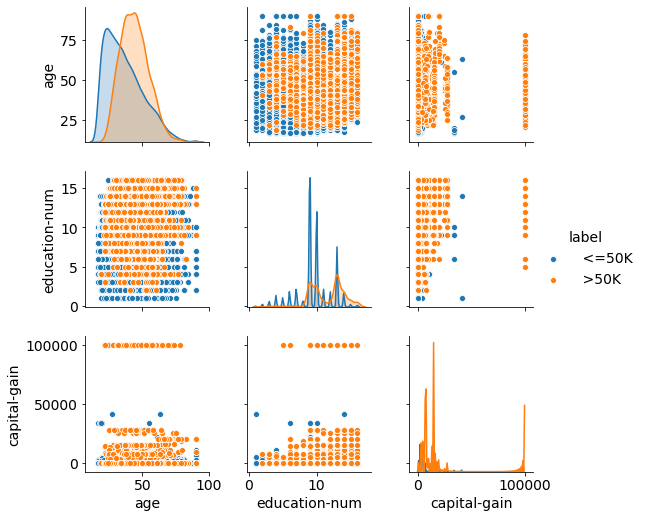

In [58]:
sns.pairplot(data,hue="label",vars=data.columns[indici])

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

numberOfFeatures = 6
pca = PCA(n_components = numberOfFeatures).fit(data_scaled)

pcaFeatures = pd.DataFrame(pca.transform(data_scaled))
pcaFeatures['label']=targetData

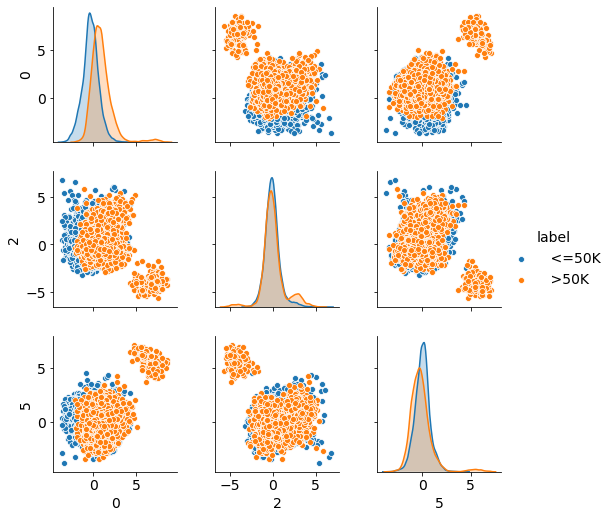

In [48]:
sns.pairplot(pcaFeatures,hue="label",vars=pcaFeatures.columns[[0,2,5]])

Pasul 1: Pregatim baza de date:

In [8]:
line_wrong=data.columns[data.eq(' ?').any()]
for i in range(len(line_wrong)):
    data=data[data[line_wrong[i]] != ' ?']
data_final=data.drop('Unnamed: 0', axis=1)

In [9]:
data_final

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,34,Local-gov,144182,Preschool,1,Never-married,Adm-clerical,Own-child,Black,Female,0,0,25,United-States,<=50K
1,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,<=50K
2,26,State-gov,152457,HS-grad,9,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,57,Self-emp-not-inc,353808,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
4,48,State-gov,122086,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29298,24,Private,89154,9th,5,Never-married,Other-service,Not-in-family,White,Male,0,0,40,El-Salvador,<=50K
29299,18,Private,59202,HS-grad,9,Never-married,Priv-house-serv,Other-relative,White,Female,0,0,10,United-States,<=50K
29300,37,Federal-gov,194630,Masters,14,Never-married,Exec-managerial,Own-child,White,Female,0,0,40,United-States,<=50K
29301,29,Private,122112,Bachelors,13,Married-civ-spouse,Sales,Wife,White,Female,0,0,50,United-States,<=50K


In [11]:
data_final.label.replace((' <=50K', ' >50K'), (0, 1), inplace=True)

#### Pasul 2: Vizulaizarea unor statistici extrase din baza de date de unde putem trage niste concluzii

In [15]:
data_final.groupby('label').mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
label,,,,,,
0,36.590951,190032.669196,9.631200,148.193409,53.021544,39.338148
1,43.945411,188818.473449,11.608359,3947.726313,195.287520,45.753235


#### Observatii: (desi raportul de perosane cu venitul <=50K la persoanele cu venitul > 50 este de 75 la 25  putem trage niste concluzii relevante)

Media de varsta la persoanele cu venitul mai mare de 50K este mai mare decat media de varsta la cei cu venitul mai mic de 50K.

Nivelul de educatie mediu este mai mare la persoanele cu venitul mai mare de 50K.

Media de capital_gain este enorm de mare la cei cu venitul >50K in comparatie cu media de capital-gain la cei cu venit<=50K.

Numarul mediu de ore lucrate pe saptamana este mai mare la cei cu venit >50K in comparatie cu media de ore lucrate saptamanl la cei cu venit<=50.


#### Pasul 3: Folosim metoda de reducere a dimensionalitatii spatiului in care lucram, cautand datele ce descriu cel mai bine coloana label 

In [16]:
good_data=data_final.loc[:, ['age', 'fnlwgt','education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]

In [17]:
good_data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,34,144182,1,0,0,25
1,20,100605,9,0,0,40
2,26,152457,9,0,0,40
3,57,353808,10,0,0,60
4,48,122086,9,0,0,40


In [20]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest


numFeatures = 3
targetData = data_final['label']
numericalData =good_data

best_features = SelectKBest(mutual_info_classif, k=numFeatures).fit_transform(numericalData,targetData)

def cauta_coloana(value):
    for i in good_data.columns:
        if good_data[i][0] == value:
            return i
col=[]
for i in range(3):
    col.append(cauta_coloana(best_features[0][i]))

print(col)

def cauta_id(j):
    id=0
    for i in data_final.columns:
        if i == col[j]:
            return id
        id=id+1
        
indici=[]
for i in range(3):
    indici.append(cauta_id(i))
print(indici)

['age', 'education-num', 'capital-gain']
[0, 4, 10]


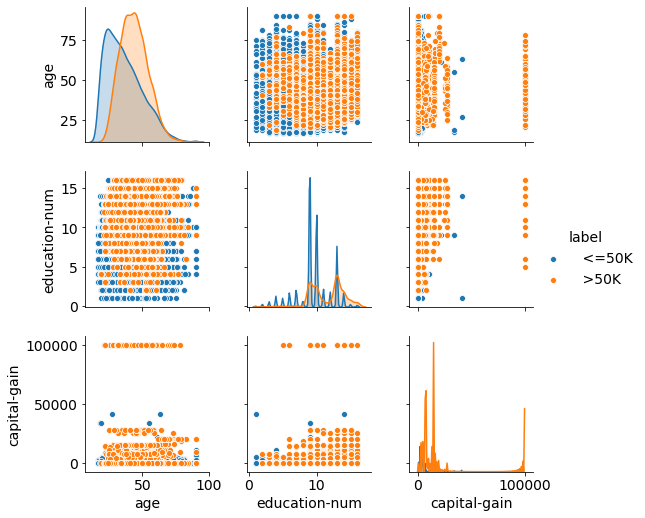

In [23]:
sns.pairplot(data,hue="label",vars=data_final.columns[indici])

### Concluzii:

Din cele doua metode pe care le-am folosit, cea de vizulaizare a datelor si cea de reducere a dimensionalitatii spatiului in care lucram (cautand cele mai bune date ce descriu o caracteristica dependenta) putem face urmatoarea recomandare:
    Pentru realizarea unui venit >50K este important ca:
    
       ->suma din declaratia de castiguri (capital-gain) sa fie mare
        
       ->varsta este un criteriu bun asupra venitului castigat, asa ca persoana cu venitul<=50K in viitor poate avea venit >50K
        
       ->numarul de ani in sistemul educational influenteaza venitul, asa ca ar fi recomandat ca persoanele cu venit<=50K sa mai faca cateva studii 
Aceste date pot fi observate atat in grafice cat si in tabelul de date medii in functie de venit.